In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import sys
print "OpenCV Version : %s " % cv2.__version__
print "Python version : %s" % sys.version_info

OpenCV Version : 2.4.13.5 
Python version : sys.version_info(major=2, minor=7, micro=14, releaselevel='final', serial=0)


In [2]:
import dlib
import numpy

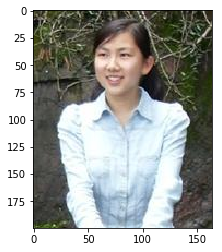

In [3]:
facePath = "girl.jpg"
colorImg = cv2.cvtColor(cv2.imread(facePath), cv2.COLOR_BGR2RGB)
plt.imshow(colorImg)

In [4]:
detector = dlib.get_frontal_face_detector()
dets = detector(colorImg, 1)
print "face number is {0}".format(len(dets))

face number is 1


In [5]:
shapePredict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detect = dets[0]

print "Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, detect.left(), detect.top(), detect.right(), detect.bottom())
shape = shapePredict(colorImg, detect)
print "Total parts of {}.".format(shape.num_parts)
xMin = len(colorImg[0])
xMax = 0
yMin = len(colorImg)
yMax = 0
for i in range(shape.num_parts):
    if (shape.part(i).x < xMin):
        xMin = shape.part(i).x
    if (shape.part(i).x > xMax):
        xMax = shape.part(i).x
    if (shape.part(i).y < yMin):
        yMin = shape.part(i).y
    if (shape.part(i).y > yMax):
        yMax = shape.part(i).y
print "x min is {}, x max is {}, y min is {}, y max is {}".format(xMin, xMax, yMin, yMax)

Detection 0: Left: 55 Top: 31 Right: 98 Bottom: 74
Total parts of 68.
x min is 56, x max is 101, y min is 34, y max is 78


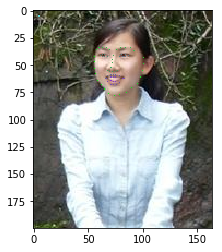

In [6]:
newImage = colorImg
newImage[5][5] = [102,223,220]
for i in range(len(colorImg)):
    for j in range(len(colorImg[0])):
        found = False
        for k in range(shape.num_parts):
            if (shape.part(k).x == j and shape.part(k).y == i):
                newImage[i][j] = [k*2,255-k*3,k*3]
                break
plt.imshow(newImage)



以Sift特征点为中心，得到mask后的图像

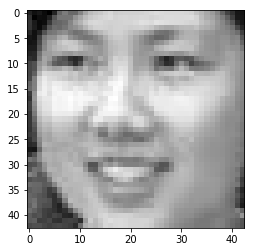

In [7]:
image = cv2.imread("girl.jpg", cv2.IMREAD_GRAYSCALE)
faceImg = image[detect.top():detect.bottom(),detect.left():detect.right()]
plt.imshow(faceImg, cmap = 'gray')

In [7]:
#SIFT  
detector = cv2.xfeatures2d.SIFT_create() 

In [8]:
keypoints = detector.detect(faceImg,None)

In [9]:
print "{0} key points detected.".format(len(keypoints))
for i in keypoints:
    print i.pt

27 key points detected.
(12.185986518859863, 2.40118408203125)
(10.367009162902832, 4.72152042388916)
(26.6776123046875, 4.694668769836426)
(8.56298542022705, 6.951444149017334)
(27.518497467041016, 9.85563850402832)
(27.518497467041016, 9.85563850402832)
(32.260780334472656, 10.020040512084961)
(32.260780334472656, 10.020040512084961)
(2.5213935375213623, 16.334251403808594)
(21.984928131103516, 18.769433975219727)
(21.869966506958008, 21.93903350830078)
(10.795158386230469, 22.408721923828125)
(21.89871597290039, 24.8576602935791)
(21.89871597290039, 24.8576602935791)
(20.55047607421875, 27.387544631958008)
(3.3043932914733887, 28.55025863647461)
(26.511249542236328, 30.64933204650879)
(26.511249542236328, 30.64933204650879)
(5.001482009887695, 36.10386276245117)
(8.208686828613281, 6.826793670654297)
(25.447650909423828, 23.12923240661621)
(19.477943420410156, 24.32659339904785)
(24.371248245239258, 27.553491592407227)
(5.946227550506592, 6.345928192138672)
(30.38094711303711, 32.66

In [10]:
imgSift = cv2.drawKeypoints(faceImg,keypoints,None) 

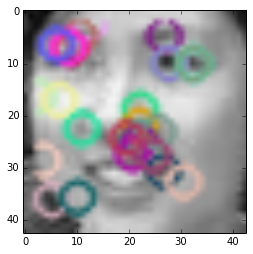

In [11]:
plt.imshow(imgSift)
plt.show()

In [12]:
# 获取特征点周边的像素坐标
span = 2
newImage = [[-1 for i in range(len(faceImg))] for i in range(len(faceImg))]
for i in range(len(faceImg)):
    for j in range(len(faceImg[0])):
        found = False
        for point in keypoints:
            pt = point.pt
            if (i-span < pt[1] and i+span > pt[1] and j-span < pt[0] and j+span > pt[0]):
                found = True
                break
        if (found):
            newImage[i][j] = faceImg[i,j]
        else:
            newImage[i][j] = -1

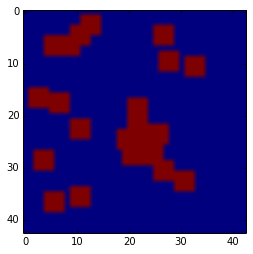

In [13]:
mask = numpy.array(newImage) > 0
maskImage = faceImg.copy()
maskImage[~mask] = 0
plt.imshow(mask)

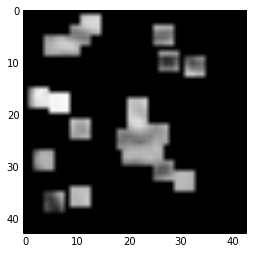

In [14]:
plt.imshow(maskImage, cmap = 'gray')